In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

In [25]:
files = os.listdir('./data')
dfs = []
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join('./data', file)
        df = pd.read_csv(file_path)
        df.rename(columns=lambda x: x.strip().lower(), inplace=True)
        dfs.append(df)

delitos = pd.concat(dfs, ignore_index=True)

print("# Data loaded successfully.")
print(f"    Total number of records: {len(delitos)}")

print("\n# First few records:")
print(delitos.head())

print("\n# Dataframe information:")
print(delitos.info())

print("\n# Descriptive statistics:")
print(delitos.describe())

# Data loaded successfully.
    Total number of records: 48444

# First few records:
    periodo_denuncia  anio_denuncia fecha_descarga distrito_fiscal  \
0  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
1  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
2  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
3  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   
4  ENERO - DICIEMBRE           2019     13/01/2020        AMAZONAS   

  especialidad tipo_caso         generico  \
0        PENAL  DENUNCIA  CONTRA EL HONOR   
1        PENAL  DENUNCIA  CONTRA EL HONOR   
2        PENAL  DENUNCIA  CONTRA EL HONOR   
3        PENAL  DENUNCIA  CONTRA EL HONOR   
4        PENAL  DENUNCIA  CONTRA EL HONOR   

                                         subgenerico articulo  \
0  CONTRA EL HONOR (Sin especificar delito subgen...    S/Art   
1                      INJURIA,CALUMNIA Y DIFAMACION      130   
2                      INJUR

# Variability Analysis

In [26]:
# Unique values in dataset")
print("\n# Unique values in dataset:")
print(delitos.nunique())


# Unique values in dataset:
periodo_denuncia       1
anio_denuncia          5
fecha_descarga         5
distrito_fiscal       34
especialidad           1
tipo_caso              1
generico              28
subgenerico          112
articulo             463
des_articulo         557
cantidad            1643
ubigeo_pjfs           34
dpto_pjfs             25
prov_pjfs             30
dist_pjfs             34
fecha_corte            3
dtype: int64


In [27]:
constantes = delitos.columns[delitos.nunique() == 1]
print("\n# Columns with constant values:")
for col in constantes:
    print(f"    {col}: {delitos[col].unique()[0]}")


# Columns with constant values:
    periodo_denuncia: ENERO - DICIEMBRE
    especialidad: PENAL
    tipo_caso: DENUNCIA


In [28]:
# Delete columns with constant values
delitos.drop(columns=constantes, inplace=True)

In [29]:
# Delete unnecessary columns
unnecessary_columns = ["des_articulo", 'fecha_corte', 'fecha_descarga']
for col in unnecessary_columns:
    if col in delitos.columns:
        delitos.drop(columns=col, inplace=True)
        print(f"Deleted unnecessary column: {col}")

# Find columns with same columns except for cantidad
print("\n# Checking for duplicate rows based on specific columns:")
columns_to_check = delitos.columns.difference(['cantidad'])

dup_withouth_first = delitos.duplicated(subset=columns_to_check.tolist(), keep='first')
original_len = delitos.shape[0]

duplicates = delitos.duplicated(subset=columns_to_check.tolist(), keep=False)
duplicate_rows = delitos[duplicates]

print(f"Number of duplicate rows found (Withouth first occurence): {dup_withouth_first.sum() }")
print(f"Number of duplicate rows found (With first occurence): {duplicate_rows.shape[0]}")
print(f"Original number of rows: {original_len}")

delitos = delitos[~duplicates]

print(f"Number of rows after removing full duplicates: {delitos.shape[0]}")
print(f"Number of rows keeping first occurrence of duplicates: {original_len - dup_withouth_first.sum() }")

if not duplicate_rows.empty:
    print("\n   = Duplicate rows found based on specified columns:")
    print(duplicate_rows)

    # Update cantidad value of duplicate rows
    print("\n# Updating 'cantidad' for duplicate rows:")
    alredy_updated = set()
    for index, row in duplicate_rows.iterrows():
        row_key = tuple(sorted(row[columns_to_check].to_dict().items()))
        print(f"Processing row {index} with values: {dict(row_key)}")
        if row_key in alredy_updated:
            continue
        condition = (duplicate_rows[columns_to_check] == row[columns_to_check]).all(axis=1)
        total_cantidad = duplicate_rows.loc[condition, 'cantidad'].sum()
        row["cantidad"] = total_cantidad
        delitos.loc[index] = row.copy()
        print(f"Updated cantidad for row {index}")
        alredy_updated.add(row_key)
else:
    print("\n   = No duplicate rows found based on specified columns.")


Deleted unnecessary column: des_articulo
Deleted unnecessary column: fecha_corte
Deleted unnecessary column: fecha_descarga

# Checking for duplicate rows based on specific columns:
Number of duplicate rows found (Withouth first occurence): 2946
Number of duplicate rows found (With first occurence): 5467
Original number of rows: 48444
Number of rows after removing full duplicates: 42977
Number of rows keeping first occurrence of duplicates: 45498

   = Duplicate rows found based on specified columns:
       anio_denuncia distrito_fiscal                          generico  \
327             2019          ANCASH  CONTRA LA ADMINISTRACION PUBLICA   
328             2019          ANCASH  CONTRA LA ADMINISTRACION PUBLICA   
1737            2019          CALLAO  CONTRA LA ADMINISTRACION PUBLICA   
1738            2019          CALLAO  CONTRA LA ADMINISTRACION PUBLICA   
1843            2019          CALLAO       CONTRA LA SEGURIDAD PUBLICA   
...              ...             ...              

In [30]:
print("\n# Final DataFrame after cleaning:")
print(f"Total number of records after cleaning: {len(delitos)}")

print("\n# Dataframe information after cleaning:")
print(delitos.info())

print("\n# Descriptive statistics after cleaning:")
print(delitos.describe())


# Final DataFrame after cleaning:
Total number of records after cleaning: 45498

# Dataframe information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 45498 entries, 0 to 44037
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   anio_denuncia    45498 non-null  int64 
 1   distrito_fiscal  45498 non-null  object
 2   generico         45498 non-null  object
 3   subgenerico      45498 non-null  object
 4   articulo         45498 non-null  object
 5   cantidad         45498 non-null  int64 
 6   ubigeo_pjfs      45498 non-null  int64 
 7   dpto_pjfs        45498 non-null  object
 8   prov_pjfs        45498 non-null  object
 9   dist_pjfs        45498 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.8+ MB
None

# Descriptive statistics after cleaning:
       anio_denuncia      cantidad    ubigeo_pjfs
count   45498.000000  45498.000000   45498.000000
mean     2021.000923    113.432019  1

# Data disaggregation

In [31]:
delitos = delitos.loc[delitos.index.repeat(delitos["cantidad"])].reset_index(drop=True).drop(columns=["cantidad"])

In [32]:
print("\n# Data expanded based on 'cantidad' column:")
print(f"Total number of records after expansion: {len(delitos)}")
print("\n# Dataframe information after expansion:")
print(delitos.info())
print("\n# Descriptive statistics after expansion:")
print(delitos.describe())


# Data expanded based on 'cantidad' column:
Total number of records after expansion: 5160930

# Dataframe information after expansion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160930 entries, 0 to 5160929
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   anio_denuncia    int64 
 1   distrito_fiscal  object
 2   generico         object
 3   subgenerico      object
 4   articulo         object
 5   ubigeo_pjfs      int64 
 6   dpto_pjfs        object
 7   prov_pjfs        object
 8   dist_pjfs        object
dtypes: int64(2), object(7)
memory usage: 354.4+ MB
None

# Descriptive statistics after expansion:
       anio_denuncia   ubigeo_pjfs
count   5.160930e+06  5.160930e+06
mean    2.021143e+03  1.272414e+05
std     1.458357e+00  5.604147e+04
min     2.019000e+03  1.010100e+04
25%     2.020000e+03  8.010800e+04
50%     2.021000e+03  1.401010e+05
75%     2.022000e+03  1.501420e+05
max     2.023000e+03  2.501010e+05


# Adjust variable type

In [33]:
# Update numerical types to int64
delitos['anio_denuncia'] = delitos['anio_denuncia'].astype('int64')
print("\n# Updated 'anio_denuncia' column to int64 type.")



# Updated 'anio_denuncia' column to int64 type.


In [34]:
to_categorical = ['distrito_fiscal','generico', 'subgenerico', 'dpto_pjfs', 'prov_pjfs', 'dist_pjfs', 'articulo', 'ubigeo_pjfs']
for col in to_categorical:
    if col in delitos.columns:
        delitos[col] = delitos[col].astype('category')
        print(f"Converted {col} to category type.")
        
delitos.info()

Converted distrito_fiscal to category type.
Converted generico to category type.
Converted subgenerico to category type.
Converted dpto_pjfs to category type.
Converted prov_pjfs to category type.
Converted dist_pjfs to category type.
Converted articulo to category type.
Converted ubigeo_pjfs to category type.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160930 entries, 0 to 5160929
Data columns (total 9 columns):
 #   Column           Dtype   
---  ------           -----   
 0   anio_denuncia    int64   
 1   distrito_fiscal  category
 2   generico         category
 3   subgenerico      category
 4   articulo         category
 5   ubigeo_pjfs      category
 6   dpto_pjfs        category
 7   prov_pjfs        category
 8   dist_pjfs        category
dtypes: category(8), int64(1)
memory usage: 83.7 MB


# Distribution of numerical variables


# Numerical columns for distribution analysis:
    anio_denuncia


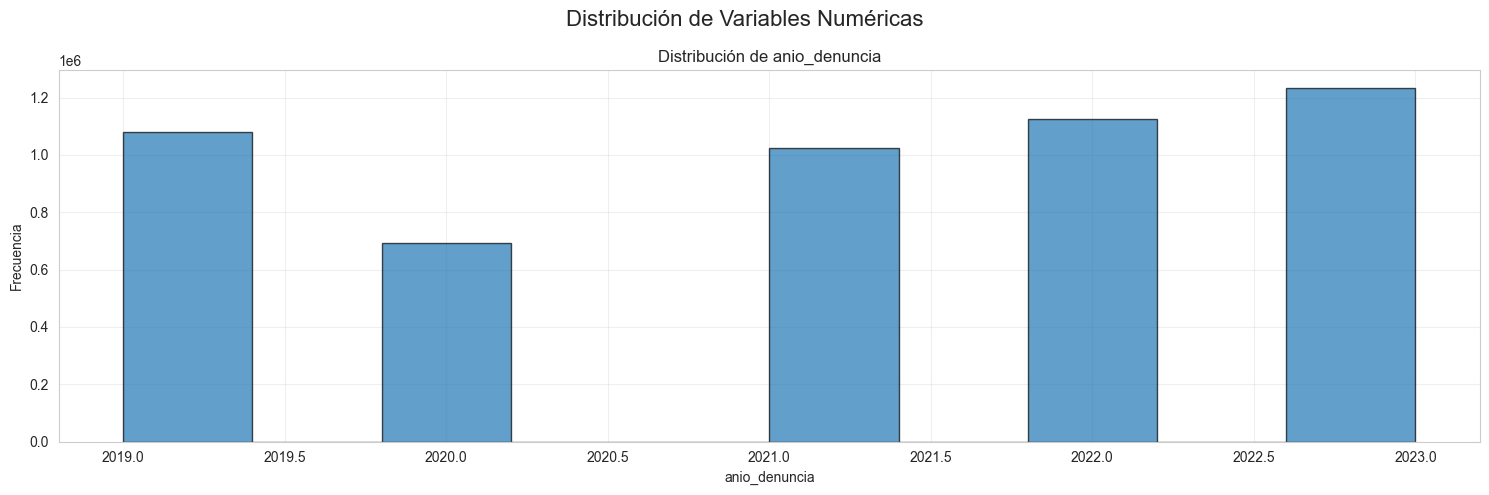

In [35]:
# Select numerical columns for distribution analysis
numeric_cols = delitos.select_dtypes(include=[np.number]).columns

print("\n# Numerical columns for distribution analysis:")
for col in numeric_cols:
    print(f"    {col}")

# Length of numerical columns
n = len(numeric_cols)

if n > 0:
    ncols = n 
    nrows = (n + ncols - 1) // ncols  # Calculate number of rows needed
    
    # Create subplots for each numerical variable
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

    # Ensure axes is a 2D array    
    if nrows == 1 and ncols == 1:
        axes = [axes]  # Convert single Axes to a list
    elif nrows == 1 or ncols == 1:
        axes = axes.flatten()  # Convert 1D array to a list
    else:
        axes = axes.flatten()  # Flatten 2D array to a list
    
    # Plot histograms for each numerical variable
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        delitos[col].hist(ax=ax, edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribución de {col}', fontsize=12)
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas en el DataFrame.")

# Distribution of categorical variables


# Categorical variables:
    distrito_fiscal: ['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', ..., 'SELVA CENTRAL', 'SULLANA', 'TACNA', 'TUMBES', 'UCAYALI']
Length: 34
Categories (34, object): ['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', ..., 'SULLANA', 'TACNA', 'TUMBES', 'UCAYALI']
    generico: ['CONTRA EL HONOR', 'CONTRA EL ORDEN ECONOMICO', 'CONTRA EL ORDEN FINANCIERO Y MONETARIO', 'CONTRA EL PATRIMONIO', 'CONTRA EL PATRIMONIO CULTURAL', ..., 'LEY Nº 30096, LEY DE DELITOS INFORMATICOS', 'CONTRA EL ESTADO Y LA DEFENSA NACIONAL', 'NO TIPIFICADOS', 'TENTATIVA', 'CONTRA LA DIGNIDAD HUMANA']
Length: 28
Categories (28, object): ['CONTRA EL ESTADO Y LA DEFENSA NACIONAL', 'CONTRA EL HONOR', 'CONTRA EL ORDEN ECONOMICO', 'CONTRA EL ORDEN FINANCIERO Y MONETARIO', ..., 'LEY 26859, LEY ORGANICA DE ELECCIONES', 'LEY Nº 30096, LEY DE DELITOS INFORMATICOS', 'NO TIPIFICADOS', 'TENTATIVA']
    subgenerico: ['CONTRA EL HONOR (Sin especificar delito subge..., 'INJURIA,CALUMNIA Y DIFAMACI

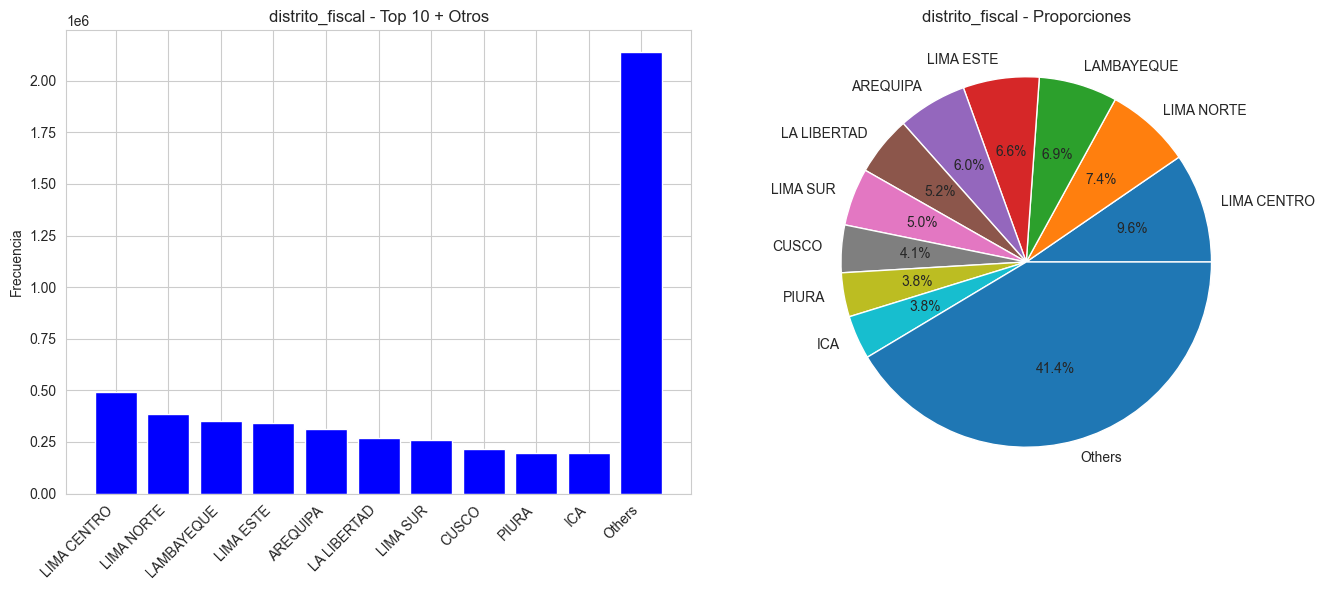


generico:
  - Unique: 28
  - Most frequent: CONTRA LA VIDA/EL CUERPO Y LA SALUD (1863402 cases)
  - Nulls: 0
Truncated 18 categories in column generico to 20 characters.
Grouping 18 categories into 'Others'

Top 10 categories for generico:
generico
CONTRA LA VIDA/EL CU    1863402
CONTRA EL PATRIMONIO    1475845
CONTRA LA SEGURIDAD      424060
CONTRA LA FAMILIA        326019
CONTRA LA ADMINISTRA     299858
CONTRA LA LIBERTAD       281133
NO TIPIFICADOS           186708
CONTRA LA FE PUBLICA     106761
LEY Nº 30096, LEY DE      83639
DELITOS AMBIENTALES       48056
Name: count, dtype: int64
Other categories grouped as 'Others' (28).


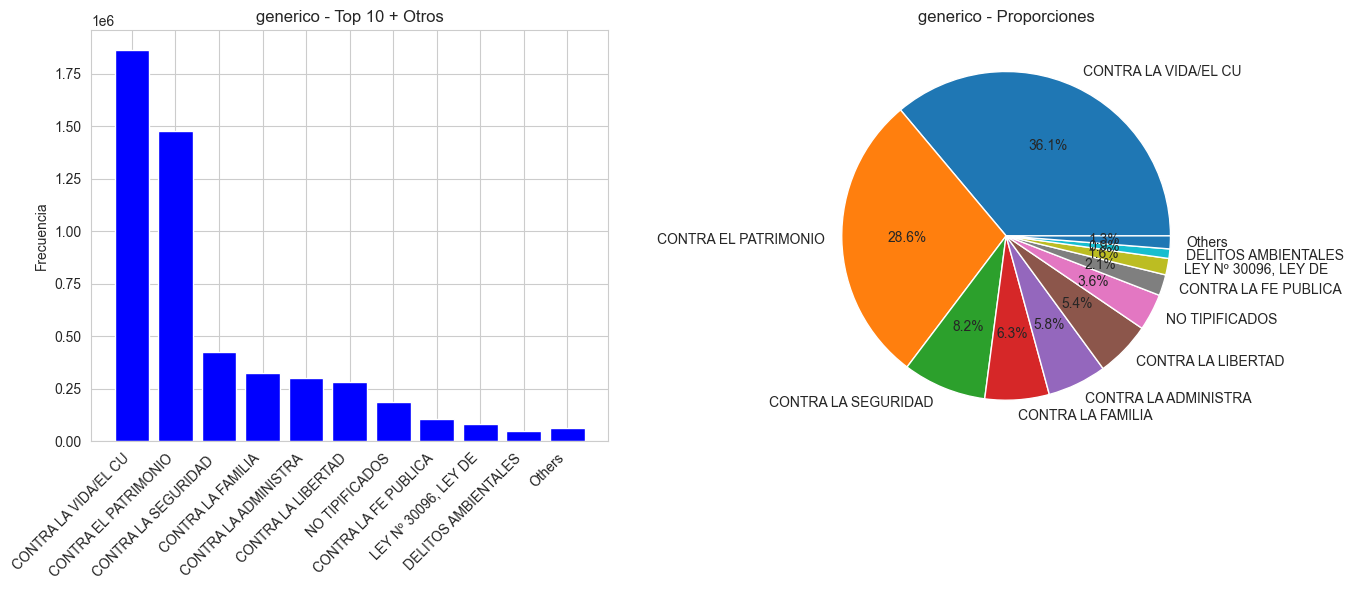


subgenerico:
  - Unique: 112
  - Most frequent: LESIONES (1737968 cases)
  - Nulls: 0
Truncated 83 categories in column subgenerico to 20 characters.
Grouping 102 categories into 'Others'

Top 10 categories for subgenerico:
subgenerico
LESIONES                1737968
HURTO                    610396
DELITO DE PELIGRO CO     323848
ROBO                     308483
OMISION DE ASISTENCI     296124
NO TIPIFICADOS           186708
VIOLACION DE LA LIBE     170012
DELITOS COMETIDOS PO     133524
ESTAFA Y OTRAS DEFRA     132023
DELITOS COMETIDOS PO     121213
Name: count, dtype: int64
Other categories grouped as 'Others' (112).


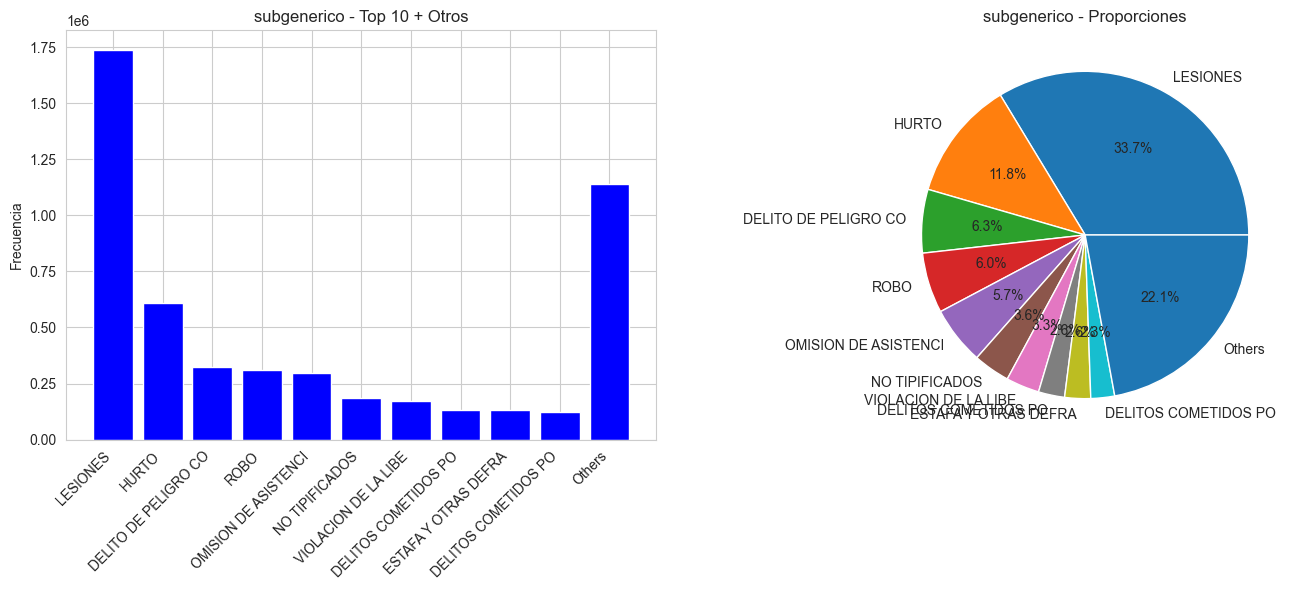


articulo:
  - Unique: 463
  - Most frequent: 122-B (1381276 cases)
  - Nulls: 0
Truncated 0 categories in column articulo to 20 characters.
Grouping 453 categories into 'Others'

Top 10 categories for articulo:
articulo
122-B    1381276
S/Art     445487
186       357751
149       287678
274       281048
189       247747
S/N       187807
185       152911
368       111580
196       108012
Name: count, dtype: int64
Other categories grouped as 'Others' (463).


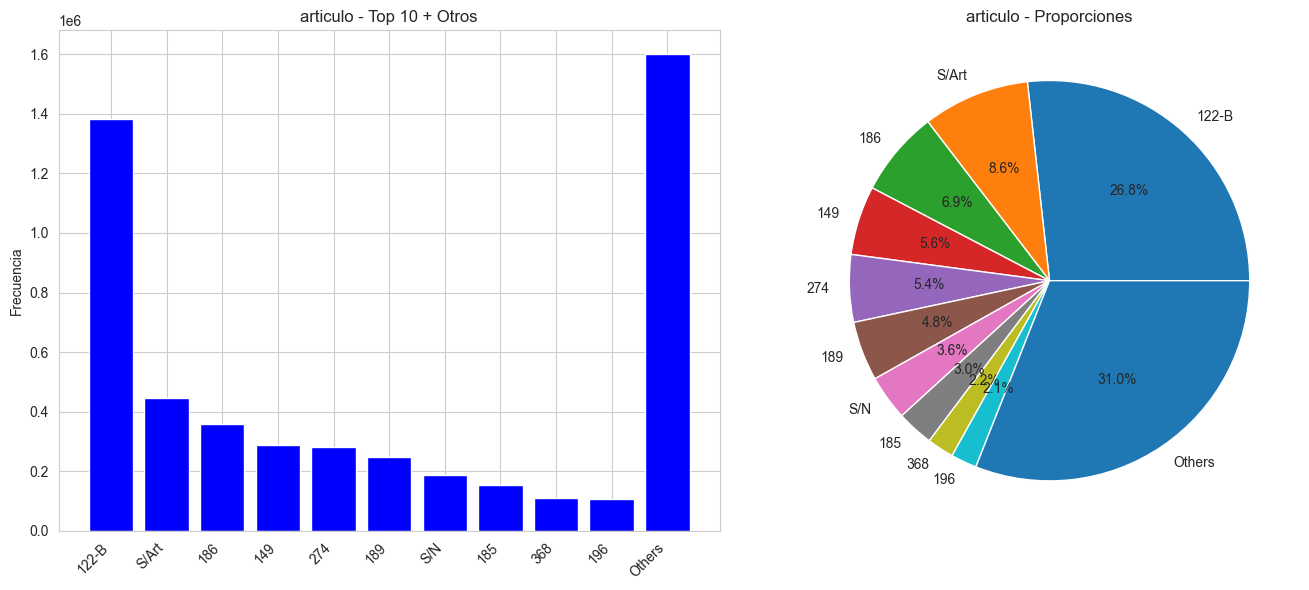


ubigeo_pjfs:
  - Unique: 34
  - Most frequent: 150101 (494218 cases)
  - Nulls: 0
Truncated 0 categories in column ubigeo_pjfs to 20 characters.
Grouping 24 categories into 'Others'

Top 10 categories for ubigeo_pjfs:
ubigeo_pjfs
150101    494218
150112    384253
140101    353607
150137    342560
40101     312024
130101    268584
150142    259404
80108     213951
200101    198328
110101    197066
Name: count, dtype: int64
Other categories grouped as 'Others' (34).


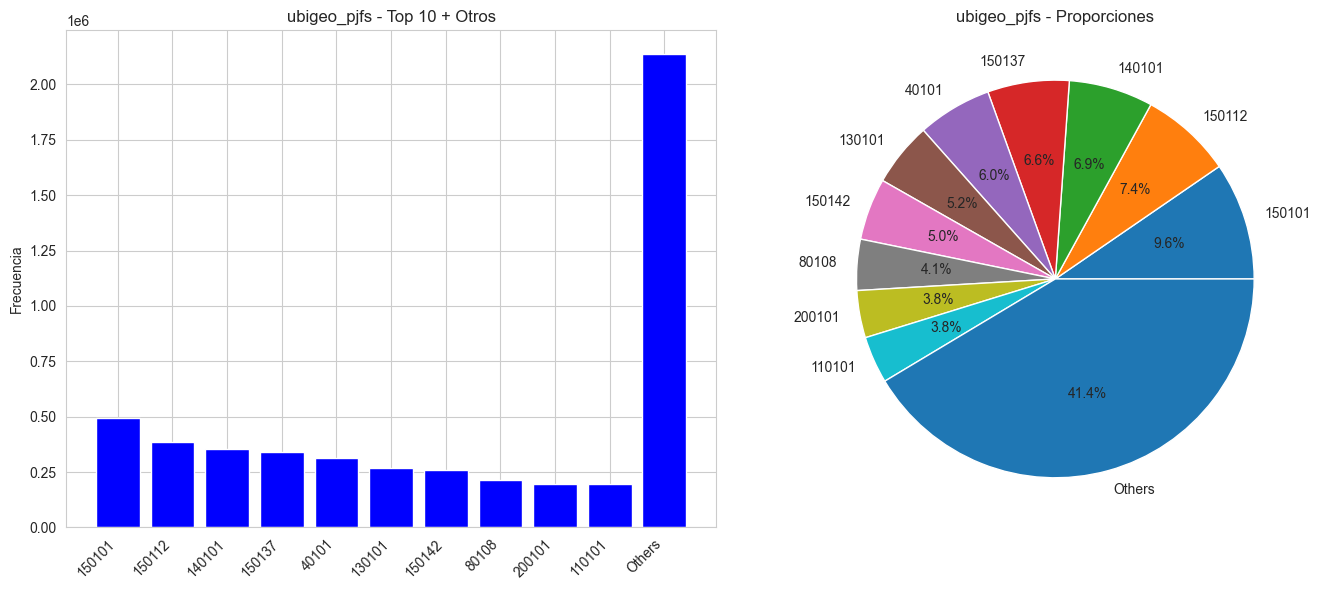


dpto_pjfs:
  - Unique: 25
  - Most frequent: LIMA (1646693 cases)
  - Nulls: 0
Truncated 0 categories in column dpto_pjfs to 20 characters.
Grouping 15 categories into 'Others'

Top 10 categories for dpto_pjfs:
dpto_pjfs
LIMA           1646693
LAMBAYEQUE      353607
AREQUIPA        312024
PIURA           270002
LA LIBERTAD     268584
CALLAO          249375
JUNIN           240298
CUSCO           213951
ANCASH          210228
ICA             197066
Name: count, dtype: int64
Other categories grouped as 'Others' (25).


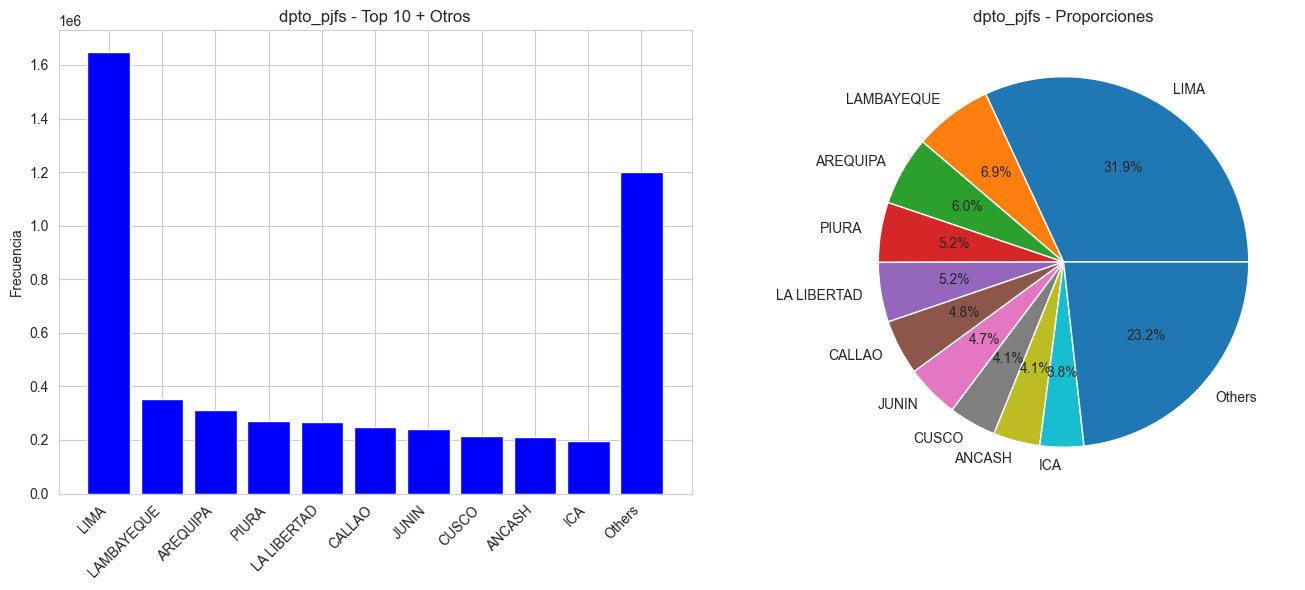


prov_pjfs:
  - Unique: 30
  - Most frequent: LIMA (1480435 cases)
  - Nulls: 0
Truncated 0 categories in column prov_pjfs to 20 characters.
Grouping 20 categories into 'Others'

Top 10 categories for prov_pjfs:
prov_pjfs
LIMA        1480435
CHICLAYO     353607
AREQUIPA     312024
TRUJILLO     268584
CALLAO       249375
CUSCO        213951
PIURA        198328
ICA          197066
HUANCAYO     172617
HUANUCO      140947
Name: count, dtype: int64
Other categories grouped as 'Others' (30).


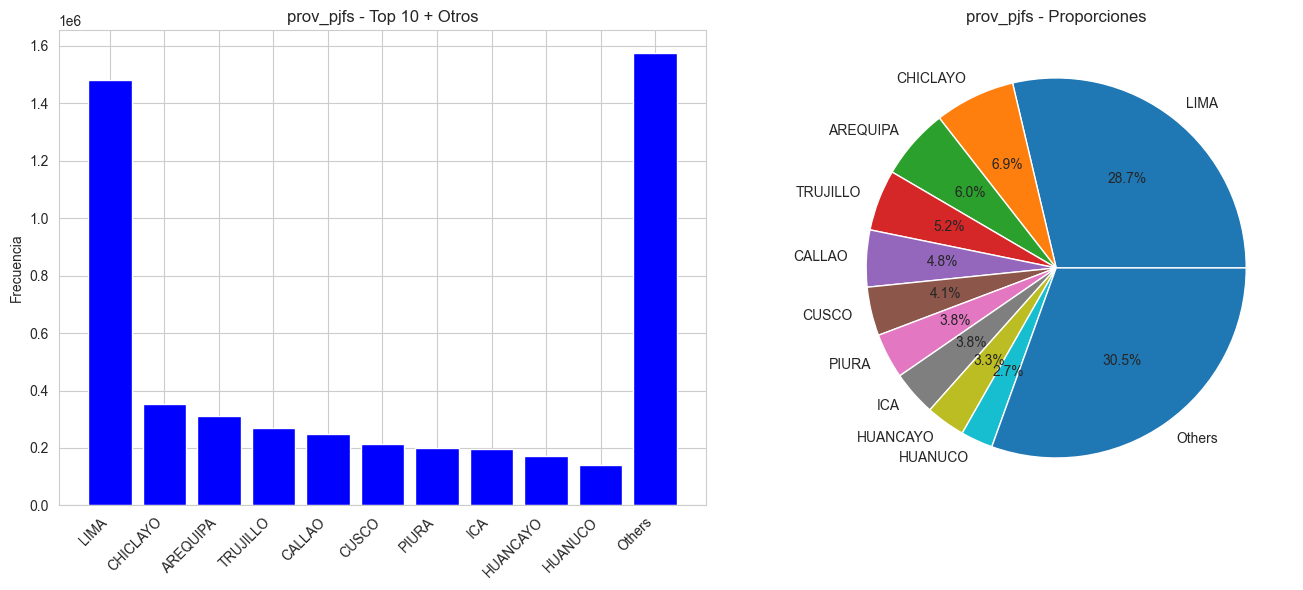


dist_pjfs:
  - Unique: 34
  - Most frequent: LIMA (494218 cases)
  - Nulls: 0
Truncated 1 categories in column dist_pjfs to 20 characters.
Grouping 24 categories into 'Others'

Top 10 categories for dist_pjfs:
dist_pjfs
LIMA                 494218
INDEPENDENCIA        384253
CHICLAYO             353607
SANTA ANITA          342560
AREQUIPA             312024
TRUJILLO             268584
VILLA EL SALVADOR    259404
WANCHAQ              213951
PIURA                198328
ICA                  197066
Name: count, dtype: int64
Other categories grouped as 'Others' (34).


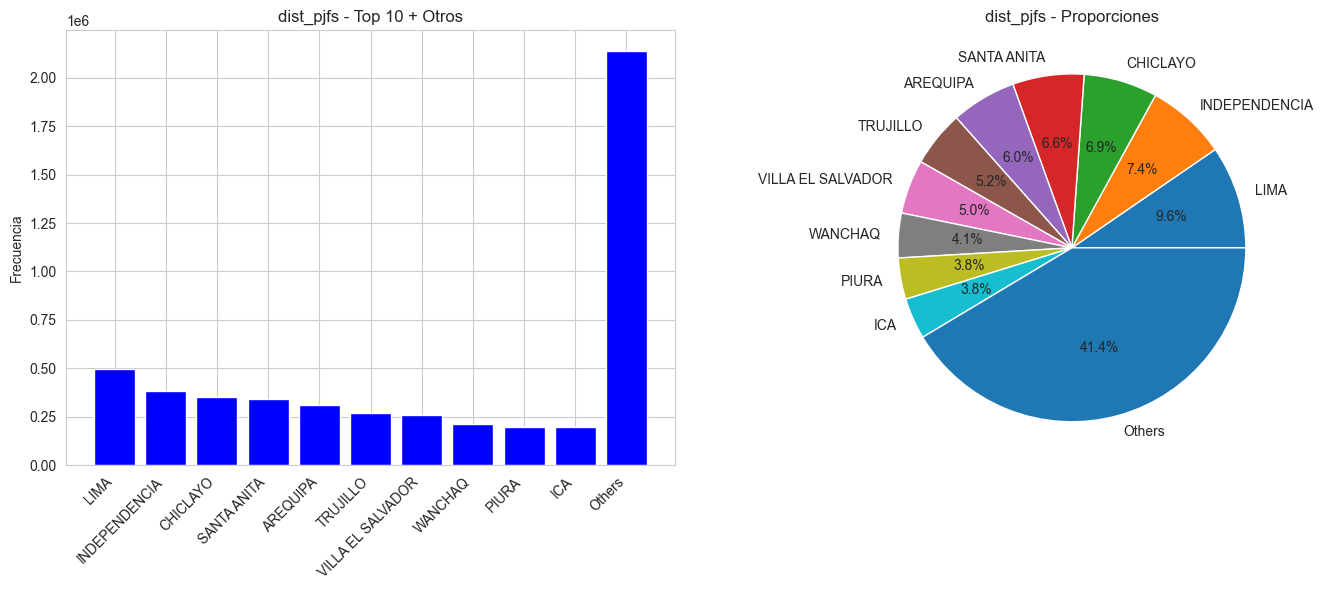

In [36]:
def create_top_with_others(df, col, top_n=10):
    """
    Create a new column with the top N categories and 'Others' for the rest.
    """
    counts = df[col].value_counts()
    
    truncated_cols = 0
    for index in counts.index:
        # Check if the index is a string and truncate if necessary
        if isinstance(index, str) and len(index) > 20:
            truncated_cols += 1
            counts.rename(index={index: index[:20]}, inplace=True)
    
    print(f"Truncated {truncated_cols} categories in column {col} to 20 characters.")

    if len(counts) <= top_n:
        print(f"Column {col} has {len(counts)} unique categories, which is less than or equal to {top_n}. No grouping needed.")
        return counts.index, counts
    
    top_categories = counts.head(top_n)
    print(f"Grouping {len(counts) - top_n} categories into 'Others'")
    plot_data = pd.concat([top_categories, pd.Series({'Others': counts.iloc[top_n:].sum()})])

    print(f"\nTop {top_n} categories for {col}:")
    print(counts.head(top_n))
    if len(counts) > top_n:
        print(f"Other categories grouped as 'Others' ({len(counts - top_n)}).")
    
    return top_categories.index, plot_data

# Distribution of categorical variables
categorical_columns = delitos.select_dtypes(include=['category']).columns
if len(categorical_columns) > 0:
    print("\n# Categorical variables:")
    for col in categorical_columns:
        print(f"    {col}: {delitos[col].unique()}")
        print("="*50)   
    

# Set seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

for col in categorical_columns:

    # Estadísticas
    print(f"\n{col}:")
    print(f"  - Unique: {delitos[col].nunique()}")
    print(f"  - Most frequent: {delitos[col].mode().iloc[0]} ({delitos[col].value_counts().iloc[0]} cases)")
    print(f"  - Nulls: {delitos[col].isnull().sum()}")


    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    top_categories, data_filtered = create_top_with_others(delitos, col, top_n=10)
    if data_filtered.empty:
        print(f"No data available for {col}. Skipping plot.")
        continue
    
    # Gráfico de barras
    plt.subplot(1, 2, 1)
    plt.bar(range(len(data_filtered)), data_filtered.values, 
            color=['red' if x == 'Otros' else 'blue' for x in data_filtered.index])
    plt.xticks(range(len(data_filtered)), data_filtered.index, rotation=45, ha='right')
    plt.title(f'{col} - Top 10 + Otros')
    plt.ylabel('Frecuencia')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(data_filtered.values, labels=data_filtered.index, autopct='%1.1f%%')
    plt.title(f'{col} - Proporciones')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 50)

# Nulls Analysis

In [37]:
print("\n# Checking for missing values:")
print(delitos.isna().mean())


# Checking for missing values:
anio_denuncia      0.0
distrito_fiscal    0.0
generico           0.0
subgenerico        0.0
articulo           0.0
ubigeo_pjfs        0.0
dpto_pjfs          0.0
prov_pjfs          0.0
dist_pjfs          0.0
dtype: float64


# Outlier detection in numeric cols

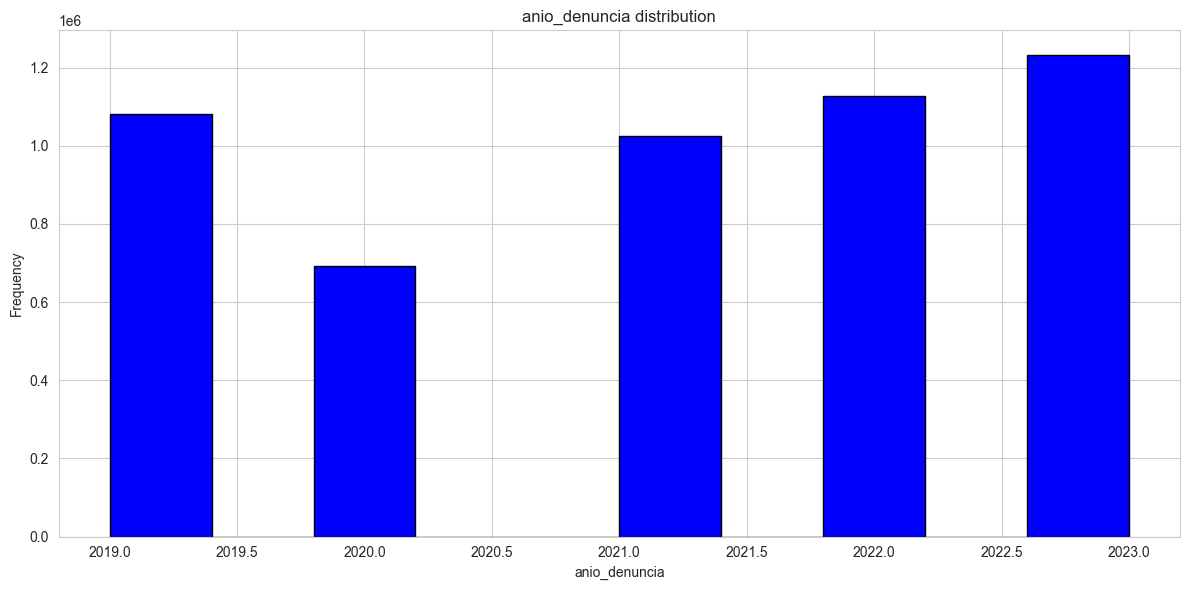

Statistics for anio_denuncia:
Q1 - 1.5IQR = 2017.00
Q1 = 2020.00
Mediana = 2021.00
Q3 = 2022.00
Q3 + 1.5IQR = 2025.00
#Observations: 5160930
#Outliers: 0


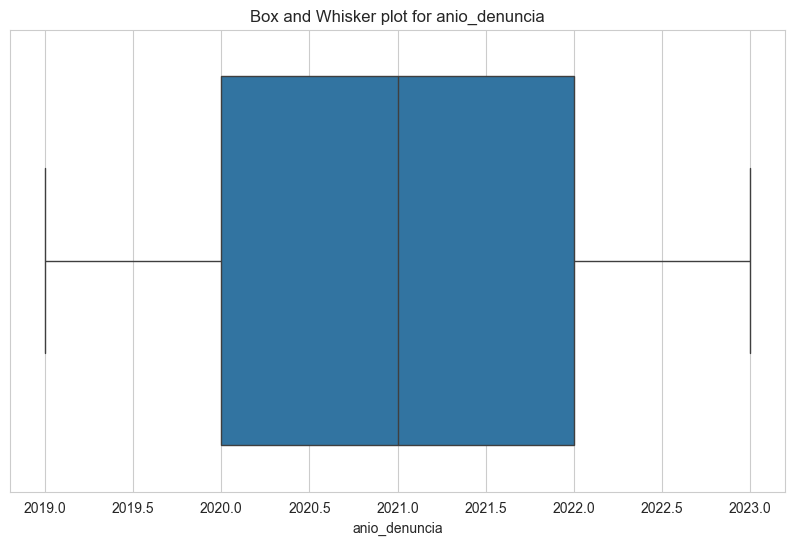

In [38]:
for col in numeric_cols:
    plt.hist(delitos[col], color='blue', edgecolor='black')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


    import seaborn as sns
    # Statistics needed to reproduce the boxplot
    Q1 = delitos[col].quantile(0.25)
    Q3 = delitos[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Statistics for {col}:")
    print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
    print(f"Q1 = {Q1:.2f}")
    print(f"Mediana = {delitos[col].median():.2f}")
    print(f"Q3 = {Q3:.2f}")
    print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
    print(f"#Observations: {len(delitos[col])}")
    print(f"#Outliers: {sum((delitos[col] < lower_bound) | (delitos[col] > upper_bound))}")

    # Construcción del gráfico de cajas y bigotes
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=delitos[col])
    plt.title(f"Box and Whisker plot for {col}")
    plt.xlabel(col)
    plt.show()

# Correlation analysis

Numeric variables: ['anio_denuncia']

Categorical variables to include:
  • distrito_fiscal: 34 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • generico: 28 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • subgenerico: 112 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • articulo: 463 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • ubigeo_pjfs: 34 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • dpto_pjfs: 25 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • prov_pjfs: 30 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):


  • dist_pjfs: 34 categorías


C:\Users\lucad\AppData\Local\Temp\ipykernel_6224\3487397697.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(delitos[col]):



Total variables: 9


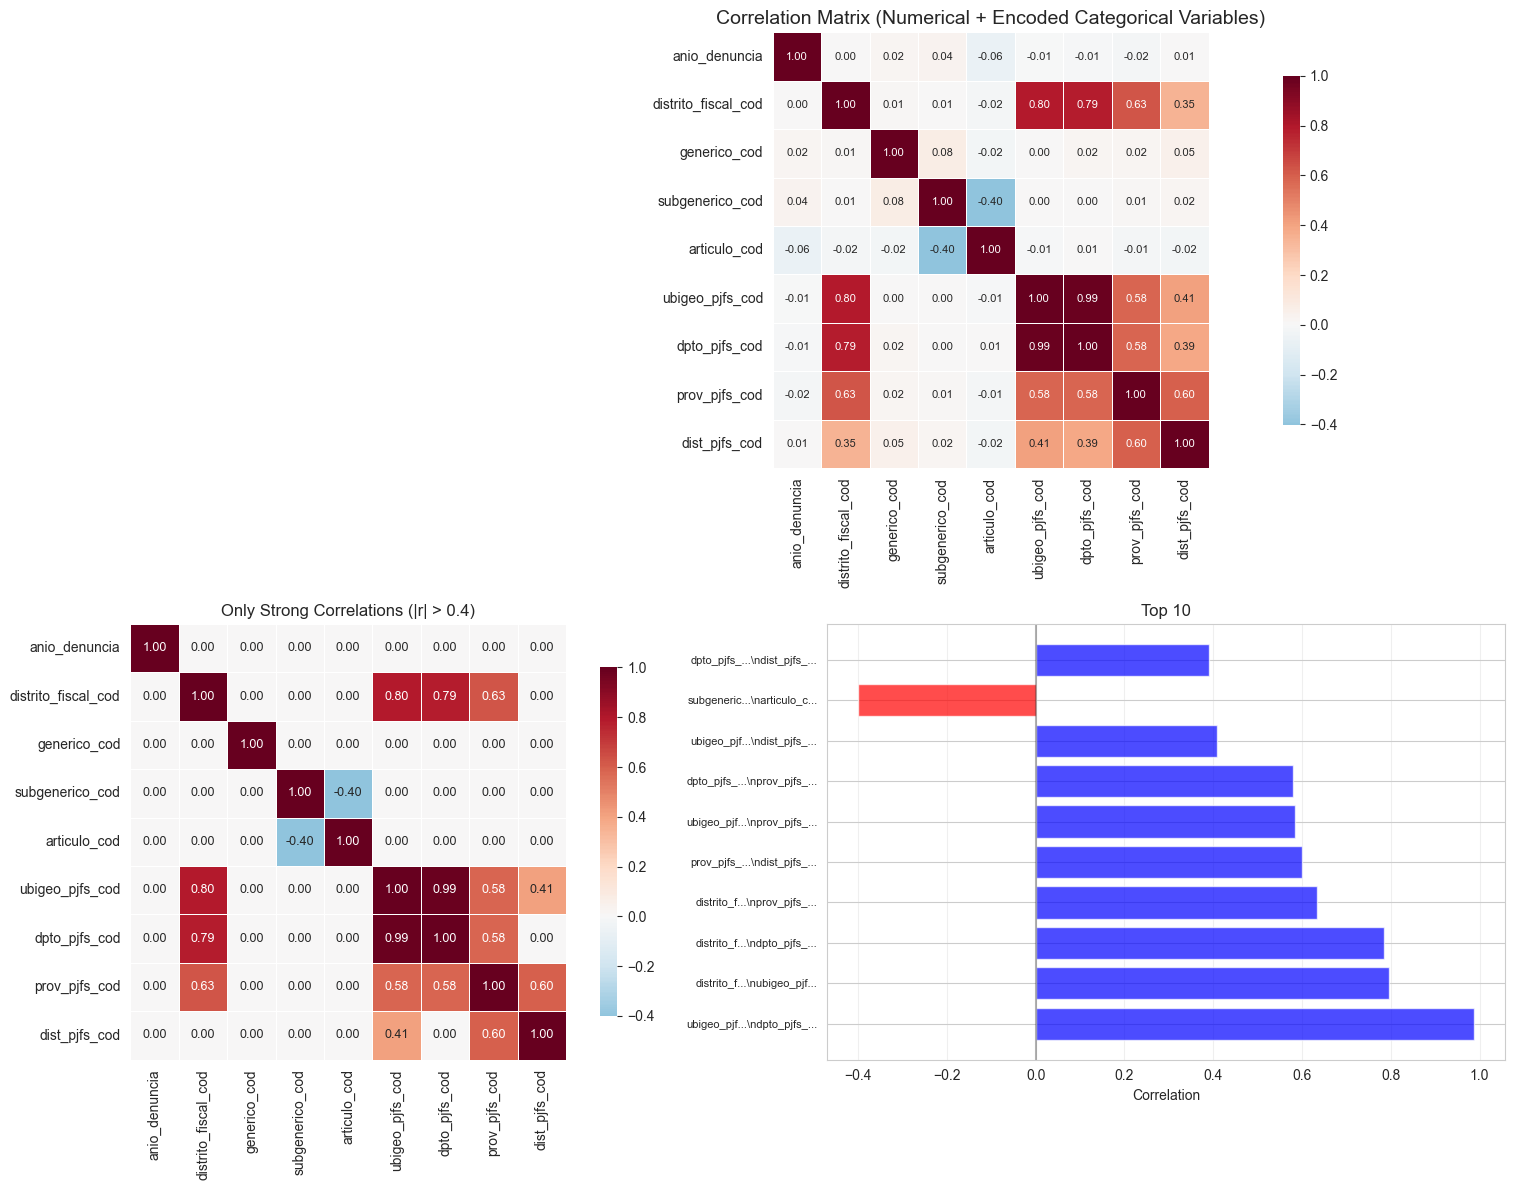


📊 RESUME:
• Total pairs analyzed: 36
• Strong correlations (|r| > 0.7): 3
• Moderate correlations (0.3 < |r| < 0.7): 8
• Weak correlations (|r| < 0.3): 25


In [39]:
# 1. Variables numéricas (como antes)
num_variables = delitos.select_dtypes(include=[np.number])
print(f"Numeric variables: {list(num_variables.columns)}")

# 2. Agregar variables categóricas codificadas
df_para_correlacion = num_variables.copy()

# Obtener variables categóricas con pocas categorías
cat_variables = delitos.select_dtypes(include=['object', 'category'])
le = LabelEncoder()

print(f"\nCategorical variables to include:")
for col in categorical_columns:
    n_unique = delitos[col].nunique()
    print(f"  • {col}: {n_unique} categorías")
    
    # Si es Categorical, agregar 'Sin_dato' a las categorías antes de fillna
    if pd.api.types.is_categorical_dtype(delitos[col]):
        if "No_data" not in delitos[col].cat.categories:
            delitos[col] = delitos[col].cat.add_categories(["No_data"])
    col_sin_nulos = delitos[col].fillna('No_data')
    df_para_correlacion[f"{col}_cod"] = le.fit_transform(col_sin_nulos)

print(f"\nTotal variables: {len(df_para_correlacion.columns)}")

# 3. Calcular correlaciones
correlacion = df_para_correlacion.corr()

# 4. Crear gráficos
plt.figure(figsize=(16, 12))

# Gráfico principal: Heatmap
plt.subplot(2, 2, (1, 2))
sns.heatmap(correlacion, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix (Numerical + Encoded Categorical Variables)', fontsize=14)

# Gráfico de correlaciones fuertes
plt.subplot(2, 2, 3)
correlacion_fuerte = correlacion.copy()
correlacion_fuerte[abs(correlacion_fuerte) < 0.4] = 0  # Solo correlaciones > 0.4

sns.heatmap(correlacion_fuerte, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 9})
plt.title('Only Strong Correlations (|r| > 0.4)', fontsize=12)

# Top correlaciones en barras
plt.subplot(2, 2, 4)

# Extraer pares de correlaciones (sin diagonal)
pares_corr = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if not np.isnan(correlacion.iloc[i, j]):
            pares_corr.append({
                'par': f"{correlacion.columns[i][:10]}...\\n{correlacion.columns[j][:10]}...",
                'valor': correlacion.iloc[i, j]
            })

# Ordenar por valor absoluto y tomar top 10
pares_corr = sorted(pares_corr, key=lambda x: abs(x['valor']), reverse=True)[:10]

labels = [p['par'] for p in pares_corr]
values = [p['valor'] for p in pares_corr]
colors = ['red' if v < 0 else 'blue' for v in values]

plt.barh(range(len(labels)), values, color=colors, alpha=0.7)
plt.yticks(range(len(labels)), labels, fontsize=8)
plt.xlabel('Correlation')
plt.title('Top 10', fontsize=12)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 5. Resumen
print(f"\n📊 RESUME:")
correlaciones_flat = correlacion.values[np.triu_indices_from(correlacion.values, k=1)]
correlaciones_flat = correlaciones_flat[~np.isnan(correlaciones_flat)]

print(f"• Total pairs analyzed: {len(correlaciones_flat)}")
print(f"• Strong correlations (|r| > 0.7): {sum(abs(c) > 0.7 for c in correlaciones_flat)}")
print(f"• Moderate correlations (0.3 < |r| < 0.7): {sum(0.3 < abs(c) < 0.7 for c in correlaciones_flat)}")
print(f"• Weak correlations (|r| < 0.3): {sum(abs(c) < 0.3 for c in correlaciones_flat)}")